# Task 1: Laying the Foundation for Analysis
# EDA on Brent Oil Prices


In [1]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [3]:
plt.style.use('ggplot')


# 2️⃣ Load Brent Oil Prices

In [4]:
brent = pd.read_csv("../../data/raw/BrentOilPrices.csv", parse_dates=["Date"])
brent.sort_values("Date", inplace=True)
brent.reset_index(drop=True, inplace=True)

print("Data loaded successfully!")
print(brent.head())

C:\Users\ruham\AppData\Local\Temp\ipykernel_5768\2361640820.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent = pd.read_csv("../../data/raw/BrentOilPrices.csv", parse_dates=["Date"])


Data loaded successfully!
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


# 3️⃣ Basic Data Checks

In [5]:
print("\nData info:")
print(brent.info())
print("\nMissing values:", brent.isnull().sum().sum())
print("Duplicates:", brent.duplicated().sum())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB
None

Missing values: 0
Duplicates: 0


# 4️⃣ Plot Brent Oil Prices

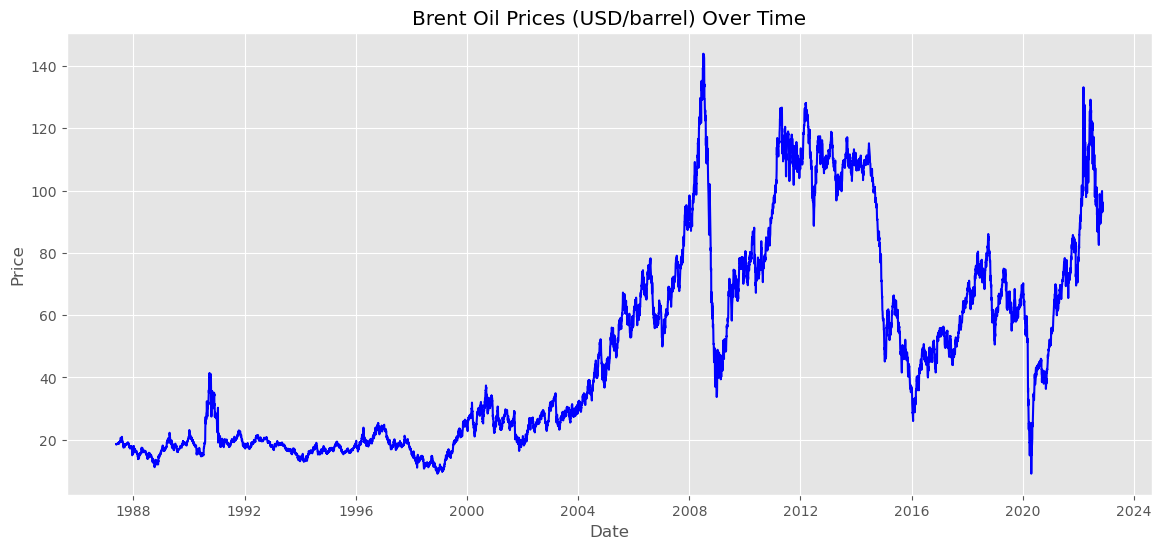

In [6]:
plt.figure(figsize=(14,6))
plt.plot(brent['Date'], brent['Price'], color='blue')
plt.title("Brent Oil Prices (USD/barrel) Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# 5️⃣ Compute Daily Log Returns

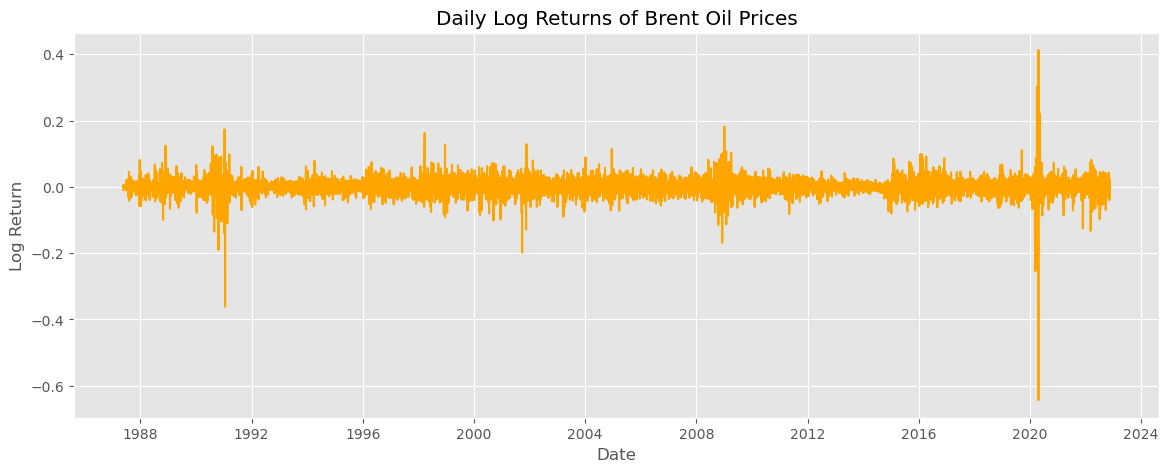

In [7]:
brent['LogReturn'] = np.log(brent['Price'] / brent['Price'].shift(1))
brent.dropna(inplace=True)

plt.figure(figsize=(14,5))
plt.plot(brent['Date'], brent['LogReturn'], color='orange')
plt.title("Daily Log Returns of Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()


# 6️⃣ Stationarity Testing

In [8]:
result = adfuller(brent['LogReturn'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("The log returns series is likely stationary.")
else:
    print("The log returns series is likely non-stationary.")

ADF Statistic: -16.427113494485855
p-value: 2.4985801611431036e-29
The log returns series is likely stationary.


# 7️⃣ Volatility Analysis
# -------------------------------
# Rolling standard deviation (volatility)


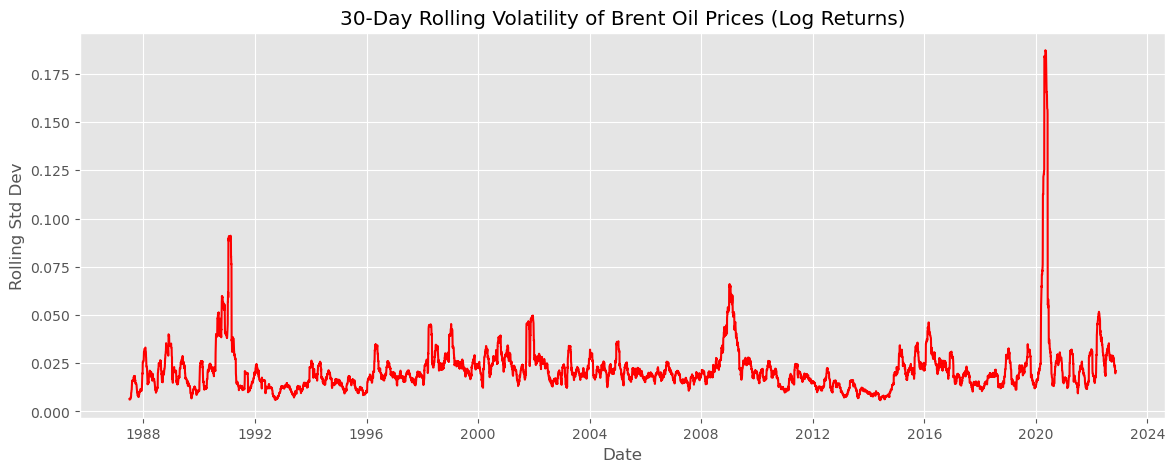

In [9]:
brent['RollingStd'] = brent['LogReturn'].rolling(window=30).std()

plt.figure(figsize=(14,5))
plt.plot(brent['Date'], brent['RollingStd'], color='red')
plt.title("30-Day Rolling Volatility of Brent Oil Prices (Log Returns)")
plt.xlabel("Date")
plt.ylabel("Rolling Std Dev")
plt.show()


8️⃣ Load Key Events

In [11]:
events = pd.read_csv("../../data/oil_events.csv", parse_dates=["Start_Date"])
print("\nEvents loaded:")
print(events.head())


Events loaded:
                          Event Start_Date            Type
0                      Gulf War 1990-08-02        Conflict
1           OPEC Production Cut 1998-03-31   OPEC Decision
2  2008 Global Financial Crisis 2008-09-15  Economic Shock
3                   Arab Spring 2011-01-25       Political
4               Libya Civil War 2011-02-15        Conflict


# 9️⃣ Plot Prices with Event Markers

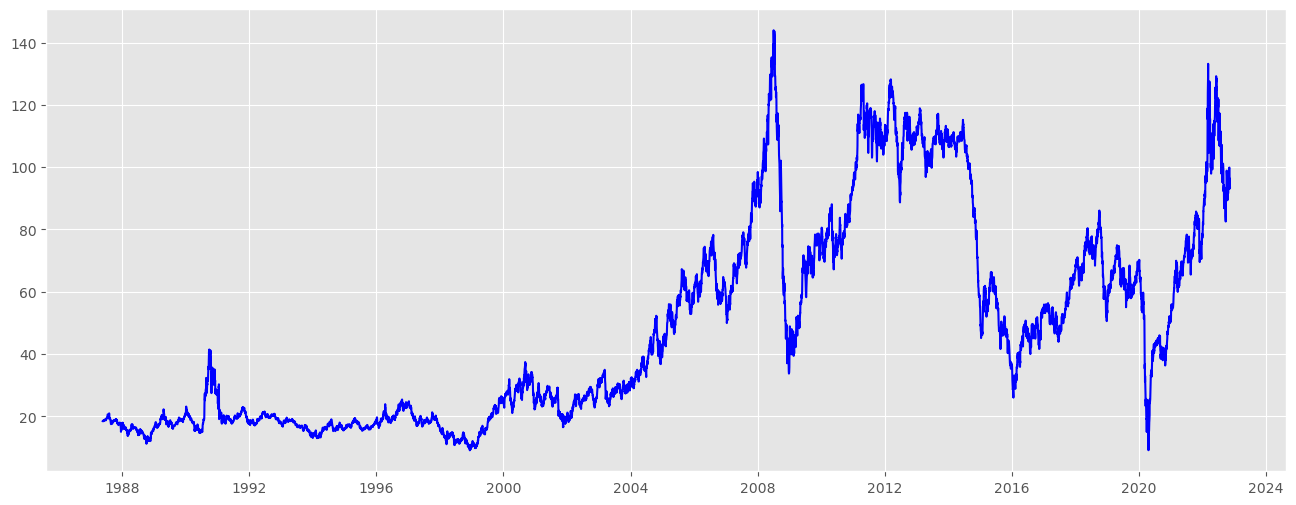

In [12]:
plt.figure(figsize=(16,6))
plt.plot(brent['Date'], brent['Price'], color='blue', label='Brent Price')


# Overlay events

C:\Users\ruham\AppData\Local\Temp\ipykernel_5768\3959146201.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


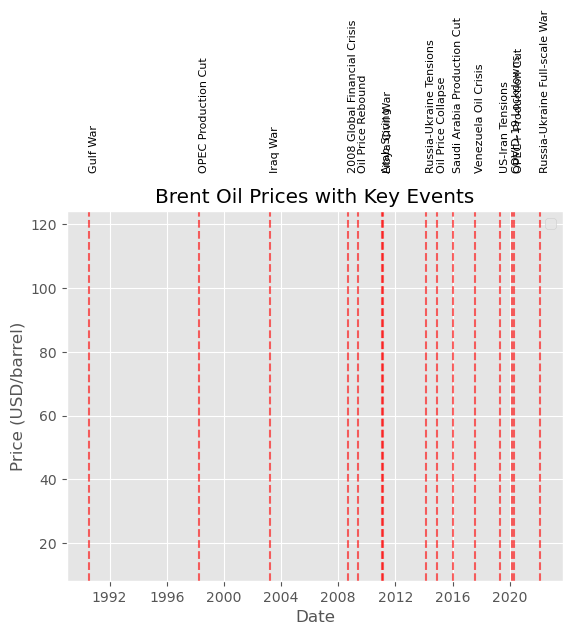

In [18]:
plt.ylim(brent['Price'].min()*0.9, brent['Price'].quantile(0.99))


for idx, row in events.iterrows():
    plt.axvline(x=row['Start_Date'], color='red', linestyle='--', alpha=0.6)
    plt.text(row['Start_Date'], brent['Price'].max()*0.95, row['Event'], rotation=90, fontsize=8)

plt.title("Brent Oil Prices with Key Events")
plt.xlabel("Date")
plt.ylabel("Price (USD/barrel)")
plt.legend()
plt.show()

📌 Stationarity Testing (Completed)

To assess whether the Brent oil price series is suitable for modeling, stationarity testing was performed on the log returns of prices using the Augmented Dickey-Fuller (ADF) test.

Results:

ADF Statistic: -16.43

p-value: 2.50 × 10⁻²⁹

Since the p-value is far below the 0.05 significance level, we reject the null hypothesis of a unit root. This indicates that the log return series is stationary.

Implication for modeling:
Stationary series are a key assumption for many statistical models, including change point detection. Therefore, using log returns rather than raw prices is appropriate for identifying structural changes in the oil market.

📌 Time Series Properties Summary

The Brent oil price time series exhibits several important characteristics:

Trend

The raw price series shows long-term trends and sudden shifts driven by geopolitical and economic events. These trends violate stationarity assumptions.

Stationarity

While the raw price series is non-stationary, the log return series is stationary, as confirmed by the ADF test.

Volatility

The log return series displays volatility clustering, with periods of calm followed by extreme fluctuations. This behavior is typical of financial time series and supports the need for models that can capture regime changes.

Modeling implication:
These properties justify the use of change point models on transformed data (log returns) rather than raw prices.

📌 Change Point Models: Conceptual Explanation

A change point model is a statistical approach used to identify points in time where the underlying behavior of a time series changes significantly.

In the context of Brent oil prices, change points may represent:

Sudden shifts in average prices

Changes in market regimes

Structural breaks caused by geopolitical or economic events

Instead of assuming that the entire time series follows a single distribution, change point models allow different segments of the data to have different parameters.

📌 Why Use a Bayesian Change Point Model?

A Bayesian approach offers several advantages:

It provides probability distributions over possible change points rather than a single fixed date

It explicitly models uncertainty in both the timing and magnitude of changes

Prior knowledge (e.g., reasonable time ranges) can be incorporated into the model

Posterior distributions enable probabilistic interpretation of results

This makes Bayesian change point detection particularly suitable for volatile and uncertain markets such as oil prices.

📌 Expected Outputs of Change Point Analysis

The Bayesian change point model is expected to produce the following outputs:

Change point (τ):
The estimated time index where a structural break occurs, represented as a posterior distribution.

Segment parameters (μ₁, μ₂):
The average log returns before and after the change point.

Uncertainty estimates:
Credible intervals showing how confident the model is about the timing and magnitude of changes.

Interpretation:
A sharp posterior peak around τ indicates high confidence in the detected change point.

📌 Assumptions and Limitations
Assumptions

Brent oil prices accurately reflect market conditions

Event dates are approximations of when market impact begins

The statistical structure within each segment is stable

Limitations

Temporal alignment does not imply causation; detected change points may coincide with events but do not prove that events caused the price changes

Other unobserved factors (macroeconomic trends, speculation, exchange rates) may influence prices

Daily price data may not capture intraday market dynamics

The model focuses on mean shifts and may not capture all volatility changes

📌 Communication Channels

The results of this analysis will be communicated through:

Technical reports for policymakers and analysts

Interactive dashboards for investors and energy companies

Visualizations highlighting change points and event associations

Narrative summaries translating statistical findings into actionable insights

These formats ensure that insights are accessible to both technical and non-technical stakeholders.

In [20]:
brent.to_csv("../../data/processed/brent_prices_clean.csv", index=False)
print("Cleaned data saved to data/processed/")

Cleaned data saved to data/processed/
